Proiectul se axează pe investigarea și compararea algoritmilor pentru rezolvarea Cubului lui Rubik de dimensiune 2×2×2, cunoscut și sub denumirea de "Pocket Cube". Cubul constă în 6 fețe, fiecare având 4 mini-fețe, și implică o serie de mutări, fiecare reprezentând o rotație cu 90° a uneia dintre cele 3 jumătăți ale cubului.

Adina-Maria Amzarescu 343C3

## Constants

In [ ]:
import numpy as np


__all__ = ['MOVES', 'CORNERS', 'COLORS']

"""
Sticker indices:
          -------
         | 16 17 |
         |       |
         | 18 19 |
  ------- ------- ------- -------
 | 12 13 | 00 01 | 04 05 | 08 09 |
 |       |   U   |   R   |       |
 | 14 15 | 02 03 | 06 07 | 10 11 |
  ------- ------- ------- -------
         | 20 21 |
         |   F   |
         | 22 23 |
          -------
"""

MOVES = np.array([
        [0, 21, 2, 23, 6, 4, 7, 5, 19, 9, 17, 11, 12, 13, 14, 15, 16, 1, 18, 3, 20, 10, 22, 8], # R
        [0, 1, 14, 15, 4, 5, 2, 3, 8, 9, 6, 7, 12, 13, 10, 11, 16, 17, 18, 19, 22, 20, 23, 21], # F
        [2, 0, 3, 1, 18, 5, 19, 7, 8, 9, 10, 11, 12, 20, 14, 21, 16, 17, 15, 13, 6, 4, 22, 23], # U
        [0, 17, 2, 19, 5, 7, 4, 6, 23, 9, 21, 11, 12, 13, 14, 15, 16, 10, 18, 8, 20, 1, 22, 3], # R'
        [0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12, 13, 2, 3, 16, 17, 18, 19, 21, 23, 20, 22], # F'
        [1, 3, 0, 2, 21, 5, 20, 7, 8, 9, 10, 11, 12, 19, 14, 18, 16, 17, 4, 6, 13, 15, 22, 23], # U'
    ])

"""
The sides of an individual cube (used when rendering the whole
2x2x2 rubik's cube) are indexed as follows:

               +--------+              +z
              /        /|              ^     (1, 1, 1)
             /    1   / | 3            |
            +--------+  |              +-------> +x
            |        |5 +             /
          4 |    2   | /             /
            |        |/             v (0, 0, 0)
            +--------+             +y
                0

The following constant maps the corners from the 3D rendering
to the actual indices of the corners in the internal representation
of the 2x2x2 cube (which is a 1D array). In addition, for each of
the 8 corners of the rubik's cube, information related to which sides
of the corner are visible.

CORNERS = {
    (3D Coords): ([indices of the corner], [visible sides]),
    ...
}
"""

CORNERS = {
    (0, 0, 0): ([11, 14, 22], [0, 4, 2]), # BOT_BL
    (1, 0, 0): ([10, 23, 7 ], [0, 2, 5]), # BOT_BR
    (0, 1, 0): ([9,  12, 16], [0, 4, 3]), # BOT_TL
    (1, 1, 0): ([8,  5,  17], [0, 5, 3]), # BOT_TR

    (0, 0, 1): ([2,  15, 20], [1, 4, 2]), # TOP_BL
    (1, 0, 1): ([3,  6,  21], [1, 5, 2]), # TOP_BR
    (0, 1, 1): ([0,  13, 18], [1, 4, 3]), # TOP_TL
    (1, 1, 1): ([1,  4,  19], [1, 5, 3]), # TOP_TR
}

"""
Face colors:
    ┌──┐
    │ 4│
 ┌──┼──┼──┬──┐
 │ 3│ 0│ 1│ 2│
 └──┼──┼──┴──┘
    │ 5│
    └──┘
"""
COLORS = {
    0: "#003DA5",  # blue
    1: "#BA0C2F",  # red
    2: "#009B48",  # green
    3: "#FE5000",  # orange
    4: "#FFD700",  # yellow
    5: "white"
}


LETTERS = {
    0: 'B',
    1: 'R',
    2: 'G',
    3: 'O',
    4: 'Y',
    5: 'W',
}

## Moves

In [ ]:
from __future__ import annotations

from typing import Union, List, TypeVar
from numbers import Number
from enum import Enum


MoveInput = TypeVar("MoveInput", int, str, Enum)
MoveSequence = TypeVar("oveSequence", List[int], str, List[Enum])
Moves = TypeVar("Moves", MoveInput, MoveSequence)

class Move(Enum):

    R = 0
    F = 1
    U = 2
    Rp = 3
    Fp = 4
    Up = 5

    def opposite(self) -> Move:
        opposites = {
            Move.R: Move.Rp,
            Move.F: Move.Fp,
            Move.U: Move.Up,
            Move.Rp: Move.R,
            Move.Fp: Move.F,
            Move.Up: Move.U
        }
        return opposites[self]

    @classmethod
    def from_str(cls, move_str: str) -> Move:
        move_dict = {
            'R':  Move.R,
            'F':  Move.F,
            'U':  Move.U,
            "R'": Move.Rp,
            "F'": Move.Fp,
            "U'": Move.Up
        }
        return move_dict[move_str]

    @classmethod
    def from_int(cls, move_int: Number) -> Move:
        if 0 <= move_int <= 5:
            return Move(move_int)
        else:
            raise ValueError(f"Invalid move {move_int}")

    @classmethod
    def parse(cls, move_input: Moves) -> Union[Move, List[Move]]:

        if isinstance(move_input, list):
            return [cls.parse(move) for move in move_input]

        if isinstance(move_input, Number):
            return cls.from_int(move_input)

        elif isinstance(move_input, str):
            if " " in move_input:
                return [cls.parse(move) for move in move_input.split(" ")]

            return cls.from_str(move_input)

        elif isinstance(move_input, Move):
            return move_input
        else:
            raise ValueError(f"Invalid move type: {move_input}")

    def __str__(self) -> str:
        move_str = {
            Move.R:  'R',
            Move.F:  'F',
            Move.U:  'U',
            Move.Rp: "R'",
            Move.Fp: "F'",
            Move.Up: "U'"
        }
        return move_str[self]


## Cube

In [ ]:
from __future__ import annotations

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import animation

import matplotlib.pyplot as plt
import numpy as np


class Cube:

    def __init__(self, moves: Moves | None = None, scrambled: bool = True):
        self.goal_state = np.repeat(np.arange(6), 4)
        self.state = np.repeat(np.arange(6), 4)

        if moves or scrambled:
            self.scramble(moves)

    def scramble(self, moves: Moves | None = None):

        if moves is None:
            num_of_moves = np.random.randint(5, 11)
            moves = list(np.random.randint(len(MOVES), size=num_of_moves))

        self.state = Cube.move_state(self.state, moves)

    def move(self, move: Moves) -> Cube:
        cube = Cube()
        cube.state = Cube.move_state(self.clone_state(), move)
        return cube

    @staticmethod
    def move_state(state: np.ndarray, move: Moves) -> np.ndarray:
        move = Move.parse(move)

        if isinstance(move, list):
            for m in move:
                state = state[MOVES[m.value]]
        else:
            state = state[MOVES[move.value]]

        return state

    def clone_state(self) -> np.ndarray:
        return np.copy(self.state)

    def clone(self) -> Cube:
        cube = Cube()
        cube.state = self.clone_state()
        return cube

    def hash(self) -> str:
        return Cube.hash_state(self.state)

    @staticmethod
    def hash_state(state: np.ndarray) -> str:
        return ''.join(map(str, state))

    @staticmethod
    def _draw_corner(ax, position, colors):

        vertices = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                         [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]]) + position

        indices = [(0, 1, 2, 3), (4, 5, 6, 7), (0, 1, 5, 4),
                   (2, 3, 7, 6), (0, 3, 7, 4), (1, 2, 6, 5)]

        faces = [[vertices[idx] for idx in face] for face in indices]

        ax.add_collection3d(Poly3DCollection(faces, facecolors=colors, linewidths=1, edgecolors='black'))

    @staticmethod
    def _draw_cube(state: np.ndarray, ax):

        for corner, (state_idxs, color_idxs) in CORNERS.items():
            colors = ["gray"] * 6

            for sticker_idx, color_idx in zip(state_idxs, color_idxs):
                colors[color_idx] = COLORS[state[sticker_idx]]

            Cube._draw_corner(ax, corner, colors)

    @staticmethod
    def render_state(state):
        fig, ax = plt.subplots(figsize=(7, 5))
        base_coords = np.array([(0, 1), (1, 1), (0, 0), (1, 0)])
        offsets = np.array([[0, 0], [1, 0], [2, 0], [-1, 0], [0, 1], [0, -1]]) * 2

        idx = 0

        for offset in offsets:
            for coords in base_coords:
                rect = plt.Rectangle(coords + offset, 1, 1, edgecolor='black', linewidth=1)
                rect.set_facecolor(COLORS[state[idx]])
                ax.add_patch(rect)

                idx += 1

        ax.set_xlim(-2.1, 6.1)
        ax.set_ylim(-2.1, 4.1)
        ax.axis('off')
        plt.show()

    def render(self):
        Cube.render_state(self.state)

    def render3D(self):

        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111, projection='3d')

        Cube._draw_cube(self.state, ax)

        ax.axis('off')
        ax.set_xlim([0, 2])
        ax.set_ylim([0, 2])
        ax.set_zlim([0, 2])
        plt.show()

    @staticmethod
    def render3D_moves(initial_state: np.ndarray, moves: MoveSequence, save: bool = False):
        moves = Move.parse(moves)

        original_state = np.copy(initial_state)
        state = initial_state

        fig = plt.figure(figsize=(4, 4), frameon=False)
        ax = fig.add_subplot(111, projection='3d')

        Cube._draw_cube(state, ax)

        ax.axis('off')
        ax.set_xlim([0, 2])
        ax.set_ylim([0, 2])
        ax.set_zlim([0, 2])

        move_index = 0

        def init():
            Cube._draw_cube(state, ax)
            return ax

        def animate(i):
            nonlocal move_index

            if i == 0:  # For the initial frame, show the original state
                state[:] = np.copy(original_state)
                Cube._draw_cube(state, ax)

            else:
                if move_index < len(moves):  # Check if there are more moves to perform
                    state[:] = Cube.move_state(state, moves[move_index])
                    ax.clear()

                    Cube._draw_cube(state, ax)
                    move_index += 1
                    ax.axis('off')
                    ax.set_xlim([0, 2])
                    ax.set_ylim([0, 2])
                    ax.set_zlim([0, 2])
                else:

                    move_index = 0
                    state[:] = np.copy(original_state)
                    Cube._draw_cube(state, ax)

        ani = animation.FuncAnimation(fig, animate, frames=len(moves) + 2, init_func=init,
                                      interval=1000, blit=False)

        if save:
            ani.save('rubiks_cube_animation.gif', writer='pillow', fps=1)

        plt.show()
        return ani

    def render_text(self):
        lines = [
            [None, None, 16, 17],
            [None, None, 18, 19],
            [12, 13, 0, 1, 4, 5, 8, 9],
            [14, 15, 2, 3, 6, 7, 10, 11],
            [None, None, 20, 21],
            [None, None, 22, 23]
        ]

        for line in lines:
            print("".join(LETTERS[self.state[idx]] if idx is not None else " " for idx in line))


    def __lt__(self, other):
        # Compare cubes based on their heuristic value
        return heuristic(self) < heuristic(other)

## A* and Bidirectional BFS

In [ ]:
from queue import PriorityQueue, deque
import numpy as np
import networkx as nx
import time
from typing import List
import heapq

def heuristic(cube):
    return sum(1 for current, goal in zip(cube.state, cube.goal_state) if current != goal)

# A* algorithm for solving the Rubik's Cube
def astar(cube, heuristic_function):
    visited = set()
    priority_queue = []
    heapq.heappush(priority_queue, (0, 0, cube, []))

    while priority_queue:
        # Pop the node with the lowest priority from the priority queue
        priority, counter, current_cube, path = heapq.heappop(priority_queue)

        # Check if the state has already been visited
        if current_cube.state.tobytes() in visited:
            continue

        # Mark the current state as visited
        visited.add(current_cube.state.tobytes())

        # Check if the goal state is reached
        if np.array_equal(current_cube.state, current_cube.goal_state):
            return path

        # Explore neighbors and add them to the priority queue
        for move in Move:
            next_cube = current_cube.move(move)
            next_priority = len(path) + heuristic_function(next_cube)
            heapq.heappush(priority_queue, (next_priority, counter + 1, next_cube, path + [move]))

    return "No solution found."

# Bidirectional BFS algorithm for solving the Rubik's Cube
def bidirectional_bfs(start_cube, goal_cube):
    start_visited = set()
    goal_visited = set()
    start_queue = deque([(start_cube, [])])
    goal_queue = deque([(goal_cube, [])])

    while start_queue and goal_queue:
        # Explore forward direction
        start_state, start_path = start_queue.popleft()

        # Explore backward direction
        goal_state, goal_path = goal_queue.popleft()

        # Check if there is a meeting point
        if start_state.state.tobytes() in goal_visited:
            return start_path + goal_path[::-1]

        # Check if there is a meeting point (in reverse)
        if goal_state.state.tobytes() in start_visited:
            return goal_path + start_path[::-1]

        # Mark the current states as visited
        start_visited.add(start_state.state.tobytes())
        goal_visited.add(goal_state.state.tobytes())

        # Explore neighbors and add them to the queues
        for move in Move:
            next_start_state = start_state.move(move)
            next_goal_state = goal_state.move(move.opposite())

            start_queue.append((next_start_state, start_path + [move]))
            goal_queue.append((next_goal_state, goal_path + [move.opposite()]))

    return "No solution found."


Algoritmul A* folosește o coadă de priorități pentru a explora stările Cubului Rubik pe baza unei funcții euristice și a costului de a ajunge la fiecare stare. Funcția euristică, denumită heuristic, estimează distanța de la starea curentă la starea scop. Algoritmul selectează iterativ starea cu cea mai mică prioritate, extinde vecinii acesteia și continuă până când se atinge starea scop sau nu se găsește nicio soluție. În schimb, algoritmul BFS bidirecțional explorează simultan stări din starea inițială și starea scop. Menține două cozi și vizitează stări în ambele direcții până când se ajunge la o stare comună, formând un traseu complet de soluție.

Case 1 - Solution: [<Move.Up: 5>, <Move.F: 1>, <Move.R: 0>, <Move.U: 2>, <Move.Rp: 3>]
Case 1 - Time taken: 0.026392459869384766 seconds
Case 2 - Solution: [<Move.Rp: 3>, <Move.Up: 5>, <Move.Fp: 4>, <Move.R: 0>, <Move.F: 1>, <Move.Rp: 3>, <Move.F: 1>]
Case 2 - Time taken: 0.09942293167114258 seconds
Case 3 - Solution: [<Move.Rp: 3>, <Move.F: 1>, <Move.Rp: 3>, <Move.Rp: 3>, <Move.U: 2>, <Move.F: 1>, <Move.U: 2>, <Move.U: 2>, <Move.Fp: 4>]
Case 3 - Time taken: 2.8807365894317627 seconds
Case 4 - Solution: [<Move.R: 0>, <Move.Fp: 4>, <Move.R: 0>, <Move.F: 1>, <Move.F: 1>, <Move.Up: 5>, <Move.F: 1>, <Move.Up: 5>, <Move.Up: 5>, <Move.F: 1>, <Move.Up: 5>]
Case 4 - Time taken: 29.11375069618225 seconds


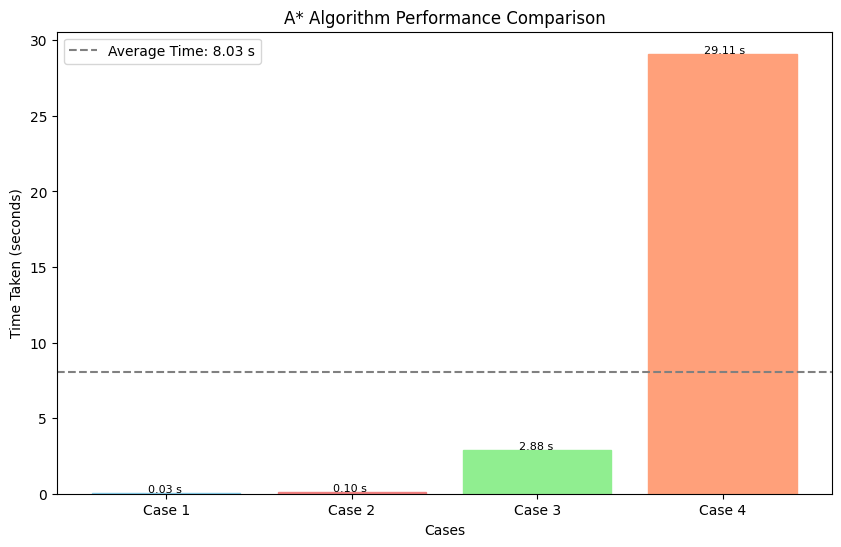

In [ ]:
%matplotlib inline
import time
import networkx as nx
import matplotlib.pyplot as plt

# Function to analyze the performance of A* algorithm on a set of Rubik's Cube cases
def analyze_cubes(cubes):
    # Create an undirected graph to visualize relationships between cubes
    graph = nx.Graph()
    times_taken = []  # List to store the time taken for each case

    # Iterate through each Rubik's Cube case
    for i, cube in enumerate(cubes):
        start_time = time.time()  # Record the starting time for measuring performance
        solution = astar(cube, heuristic)  # Apply A* algorithm to find a solution for the current cube
        end_time = time.time()  # Record the ending time

        time_taken = end_time - start_time  # Calculate the time taken for the current case
        times_taken.append(time_taken)  # Store the time taken in the list

        # Print the solution and time taken for the current case
        print(f"Case {i+1} - Solution:", solution)
        print(f"Case {i+1} - Time taken:", time_taken, "seconds")

    # Plotting the performance comparison
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = plt.bar(range(1, len(times_taken) + 1), times_taken, tick_label=[f'Case {i+1}' for i in range(len(times_taken))])

    for bar, time_taken in zip(bars, times_taken):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, f"{time_taken:.2f} s", fontsize=8)

    colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    plt.legend(['Time Taken'])
    average_time = sum(times_taken) / len(times_taken)
    plt.axhline(y=average_time, color='gray', linestyle='--', label=f'Average Time: {average_time:.2f} s')

    plt.xlabel('Cases')
    plt.ylabel('Time Taken (seconds)')
    plt.title('A* Algorithm Performance Comparison')
    plt.legend()
    plt.show()

# Test cases
case1 = "R U' R' F' U"
case2 = "F' R U R U F' U'"
case3 = "F U U F' U' R R F' R"
case4 = "U' R U' F' R F F U' F U U"

cubes = [Cube(case1), Cube(case2), Cube(case3), Cube(case4)]

analyze_cubes(cubes)

Run 1:
  Case "R U' R' F' U" - Time taken: 6.23889 seconds
  Case "F' R U R U F' U'" - Time taken: 3.06549 seconds
  Case "F U U F' U' R R F' R" - Time taken: 10.15657 seconds
  Case "U' R U' F' R F F U' F U U" - Time taken: 10.03121 seconds


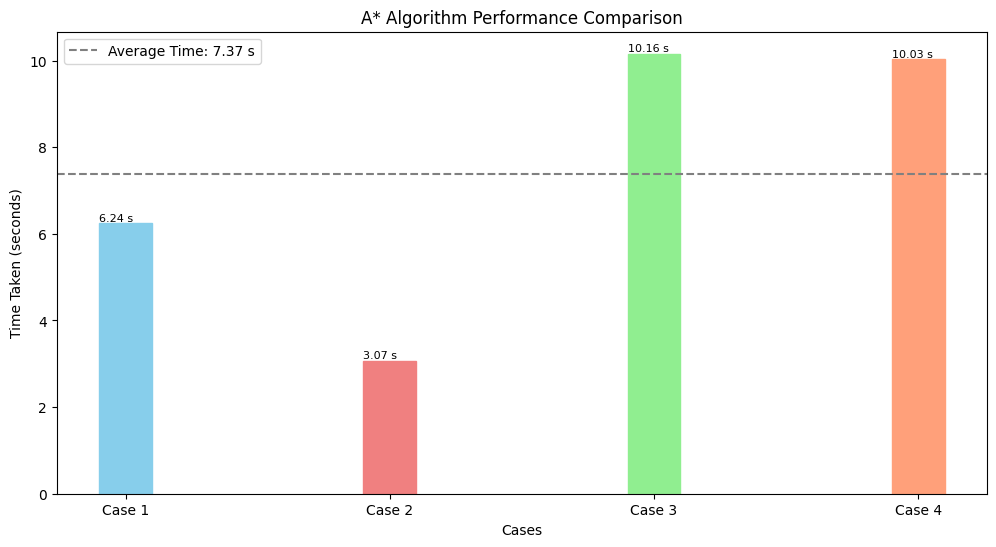

In [ ]:
%matplotlib inline
import time
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import seaborn as sns

def analyze_cubes_bidirectional(cases, num_runs):
    # Lists to store individual run times and average times
    all_times_taken = []
    all_average_times = []

    # Loop over specified number of runs
    for run in range(1, num_runs + 1):
        times_taken = []  # List to store time taken for each case in a run

        print(f"Run {run}:")
        # Loop over each cube case in the provided list
        for i, (start_case, goal_case) in enumerate(cases, start=1):
            start_cube = Cube(start_case)  # Assuming Cube class is defined elsewhere
            goal_cube = Cube(goal_case)

            # Measure time taken for bidirectional BFS on the current case
            start_time = time.time()
            solution = bidirectional_bfs(start_cube, goal_cube)  # Assuming bidirectional_bfs is implemented
            end_time = time.time()
            time_taken = end_time - start_time
            times_taken.append(time_taken)

            # Print the time taken for the current case
            print(f"  Case \"{start_case}\" - Time taken: {time_taken:.5f} seconds")

        # Calculate and print average time for the current run
        average_time = sum(times_taken) / len(times_taken)
        all_average_times.append(average_time)

        all_times_taken.append(times_taken)

    # Plotting the performance comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = plt.bar(
        [x + 0.2 for x in range(1, len(times_taken) + 1)],
        times_taken,
        width=0.2,
        tick_label=[f'Case {i+1}' for i in range(len(times_taken))]
    )

    for bar, time_taken in zip(bars, times_taken):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, f"{time_taken:.2f} s", fontsize=8)

    colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    plt.legend(['Time Taken'])
    average_time = sum(times_taken) / len(times_taken)
    plt.axhline(y=average_time, color='gray', linestyle='--', label=f'Average Time: {average_time:.2f} s')

    plt.xlabel('Cases')
    plt.ylabel('Time Taken (seconds)')
    plt.title('A* Algorithm Performance Comparison')
    plt.legend()
    plt.show()


# Test cases
case1 = "R U' R' F' U"
case2 = "F' R U R U F' U'"
case3 = "F U U F' U' R R F' R"
case4 = "U' R U' F' R F F U' F U U"

cases = [
    (case1, "U F R' U'"),
    (case2, "U R' F R F' U'"),
    (case3, "U' F R F' R' U"),
    (case4, "F R U R U' F' R' F R' U'"),
]

num_runs = 1
analyze_cubes_bidirectional(cases, num_runs)



În implementarea algoritmului A\*, observăm că fiecare caz este rezolvat prin intermediul unei secvențe de mișcări (de exemplu, Rotate Right - R, Rotate Up - U, etc.). În primul scenariu, A\* găsește soluții într-un timp relativ mic, în timp ce în cel de-al patrulea scenariu, rezolvarea durează mai mult. Diferențele de timp pot fi atribuite și funcției euristice. Pe de altă parte, în implementarea bidirecțională BFS, timpul necesar pentru rezolvare poate varia în funcție de complexitatea configurației inițiale și celei finale. Diferențele de performanță dintre cele două abordări pot fi atribuite în parte strategiei bidirecționale care explorează configurația de la început și de la final simultan, aducând astfel o posibilă îmbunătățire în timpul de răspuns.

Algoritmul A\* este eficient pentru cazuri mai simple și poate oferi soluții mai rapide atunci când spațiul de stări este mai restrâns. Pe de altă parte, algoritmul BFS este mai potrivit pentru spații de stări mai extinse și complexe.

## Monte Carlo Tree Search

In [ ]:
import random
import math
import numpy as np
from copy import copy

class MCTSNode:
    def __init__(self, state, parent=None, action=None):
        # Initialize MCTSNode with state, parent node, and action taken to reach this node
        self.state = state
        self.parent = parent
        self.action = action
        self.children = []  # List to store child nodes
        self.visits = 0      # Number of times this node has been visited
        self.value = 0       # Cumulative value associated with this node

def ucb_score(node, C):
    # Calculate the UCB1 score for a given node with exploration constant C
    if node.visits == 0:
        return float("inf")  # Return infinity for unvisited nodes
    return (node.value / node.visits) + C * math.sqrt(math.log(node.parent.visits) / node.visits)

def select(node, C):
    # Traverse the tree to select a node using UCB1 until a leaf node is reached
    while node.children:
        node = max(node.children, key=lambda x: ucb_score(x, C))
    return node

def apply_action(state, action):
    # Apply the specified action to the state and return the updated state
    state.move(action)
    return state

def expand(node):
    # Expand the given node by adding child nodes for all possible actions
    actions = list(Move)
    for action in actions:
        child_state = apply_action(node.state, action)
        child_node = MCTSNode(child_state, parent=node, action=action)
        node.children.append(child_node)
    return random.choice(node.children)  # Randomly select one of the child nodes

def simulate(node, heuristic_function, max_depth=14):
    # Simulate a random sequence of actions from the given node and return a heuristic value
    current_state = node.state
    goal_state = current_state.goal_state
    for _ in range(max_depth):
        if np.array_equal(current_state.state, goal_state):
            return float("inf")  # Return infinity for reaching the goal state
        random_move = random.choice(list(Move))
        apply_action(current_state, random_move)
    return heuristic_function(current_state)

def backpropagate(node, value):
    # Backpropagate the value obtained from simulation up the tree
    while node:
        node.visits += 1
        node.value += value
        node = node.parent

def mcts(initial_state, C, budget, heuristic_function):
    # Perform Monte Carlo Tree Search to find the best action for the given initial state
    root = MCTSNode(initial_state)

    for _ in range(budget):
        selected_node = select(root, C)
        if selected_node.visits == 0:
            value = simulate(selected_node, heuristic_function)
        else:
            expanded_node = expand(selected_node)
            value = simulate(expanded_node, heuristic_function)
        backpropagate(selected_node, value)

    best_child = max(root.children, key=lambda x: heuristic_function(x.state))
    return best_child.action

def heuristic_h2(cube):
    return 2 * random.random()

 Algoritmul începe de la nodul rădăcină, selectează nodurile copil pe baza unui echilibru între explorare și exploatare utilizând scorul UCB1, extinde nodurile frunză creând noduri copil pentru acțiuni posibile, simulează secvențe aleatorii de acțiuni pentru a estima valoarea potențială, și propagă înapoi rezultatele pentru a actualiza statisticile nodurilor. Procesul se repetă pentru un număr specificat de iterații, iar recomandarea finală pentru acțiune este determinată prin selectarea celui mai bun nod copil al rădăcinii pe baza unei funcții euristice furnizate. Iar în exemplul furnizat, funcția (heuristic_h2) returnează o valoare euristică aleatoare.

 O euristică aleatoare este flexibilă și poate fi aplicată într-o varietate de contexte, ceea ce face codul să fie mai general și să nu fie limitat la anumite reguli.

In [ ]:
%matplotlib inline
import time
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Function to run MCTS and measure the time
def run_mcts_and_measure_time(initial_state_cube, C, budget, heuristic_func):
    start_time = time.time()
    solution_action = mcts(initial_state_cube, C, budget, heuristic_func)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return solution_action, elapsed_time

# Test cases
case1 = "R U' R' F' U"
case2 = "F' R U R U F' U'"
case3 = "F U U F' U' R R F' R"
case4 = "U' R U' F' R F F U' F U U"

cases = [case1, case2, case3, case4]

C_values = [0.5, 0.1]
budget_values = [1000, 2000, 5000, 20000]

# Test MCTS with heuristic h1
results_h1 = []

for case in cases:
    cube = Cube(case)
    print(f"Testing MCTS with h1 for case: {case}")
    for C in C_values:
        for budget in budget_values:
            print(f"  C={C}, Budget={budget}:")
            times = []
            for _ in range(20):
                solution_action, elapsed_time = run_mcts_and_measure_time(cube, C, budget, heuristic)
                solution_state = cube.move(solution_action)
                print(f"    Action: {solution_action}, Heuristic value (h1): {heuristic(solution_state)}, Elapsed Time: {elapsed_time}")
                times.append(elapsed_time)
            results_h1.append(times)

# Test MCTS with heuristic h2
results_h2 = []

for case in cases:
    cube = Cube(case)
    print(f"Testing MCTS with h2 for case: {case}")
    for C in C_values:
        for budget in budget_values:
            print(f"  C={C}, Budget={budget}:")
            times = []
            for _ in range(20):
                solution_action, elapsed_time = run_mcts_and_measure_time(cube, C, budget, heuristic_h2)
                solution_state = cube.move(solution_action)
                print(f"    Action: {solution_action}, Heuristic value (h2): {heuristic_h2(solution_state)}, Elapsed Time: {elapsed_time}")
                times.append(elapsed_time)
            results_h2.append(times)

Testing MCTS with h1 for case: R U' R' F' U
  C=0.5, Budget=1000:
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.368687629699707
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.3775672912597656
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.2576501369476318
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.3499844074249268
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.2037441730499268
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.2507376670837402
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.8566513061523438
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.8968894481658936
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.3536577224731445
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.4275693893432617
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.3065690994262695
    Action: R, Heuristic value (h1): 19, Elapsed Time: 1.421680212020874
    Action: R, Heuristic value (h1): 19, Elapsed

Cazurile de test:
____________________________
case1 = "R U' R' F' U"

case2 = "F' R U R U F' U'"

case3 = "F U U F' U' R R F' R"

case4 = "U' R U' F' R F F U' F U U"

C_values = [0.5, 0.1]

budget_values = [1000, 2000, 5000, 20000]
____________________________

Pentru fiecare configurație, MCTS este rulat de 20 de ori, iar rezultatele, inclusiv acțiunile selectate de MCTS, valorile euristice și timpul scurs, sunt afișate.

Rularea de 20 de ori oferă o măsură mai robustă a eficienței algoritmului, ținând cont de variabilitatea rezultatelor întâlnite în diferite instanțe ale aceleiași configurații.

Astfel, scriptul oferă o evaluare detaliată a performanței MCTS în rezolvarea cubului Rubik în diverse scenarii și condiții.

h1, C=0.5, Budget=1000: Mean=1.4362, Std Dev=0.2180
h1, C=0.5, Budget=2000: Mean=2.8792, Std Dev=0.4150
h1, C=0.5, Budget=5000: Mean=7.2022, Std Dev=0.6576
h1, C=0.5, Budget=20000: Mean=30.3461, Std Dev=0.4739
h1, C=0.1, Budget=1000: Mean=1.4362, Std Dev=0.2180
h1, C=0.1, Budget=2000: Mean=2.8792, Std Dev=0.4150
h1, C=0.1, Budget=5000: Mean=7.2022, Std Dev=0.6576
h1, C=0.1, Budget=20000: Mean=30.3461, Std Dev=0.4739
h2, C=0.5, Budget=1000: Mean=1.4444, Std Dev=0.2481
h2, C=0.5, Budget=2000: Mean=2.8941, Std Dev=0.3408
h2, C=0.5, Budget=5000: Mean=7.2053, Std Dev=0.6340
h2, C=0.5, Budget=20000: Mean=28.7844, Std Dev=0.4762
h2, C=0.1, Budget=1000: Mean=1.4444, Std Dev=0.2481
h2, C=0.1, Budget=2000: Mean=2.8941, Std Dev=0.3408
h2, C=0.1, Budget=5000: Mean=7.2053, Std Dev=0.6340
h2, C=0.1, Budget=20000: Mean=28.7844, Std Dev=0.4762


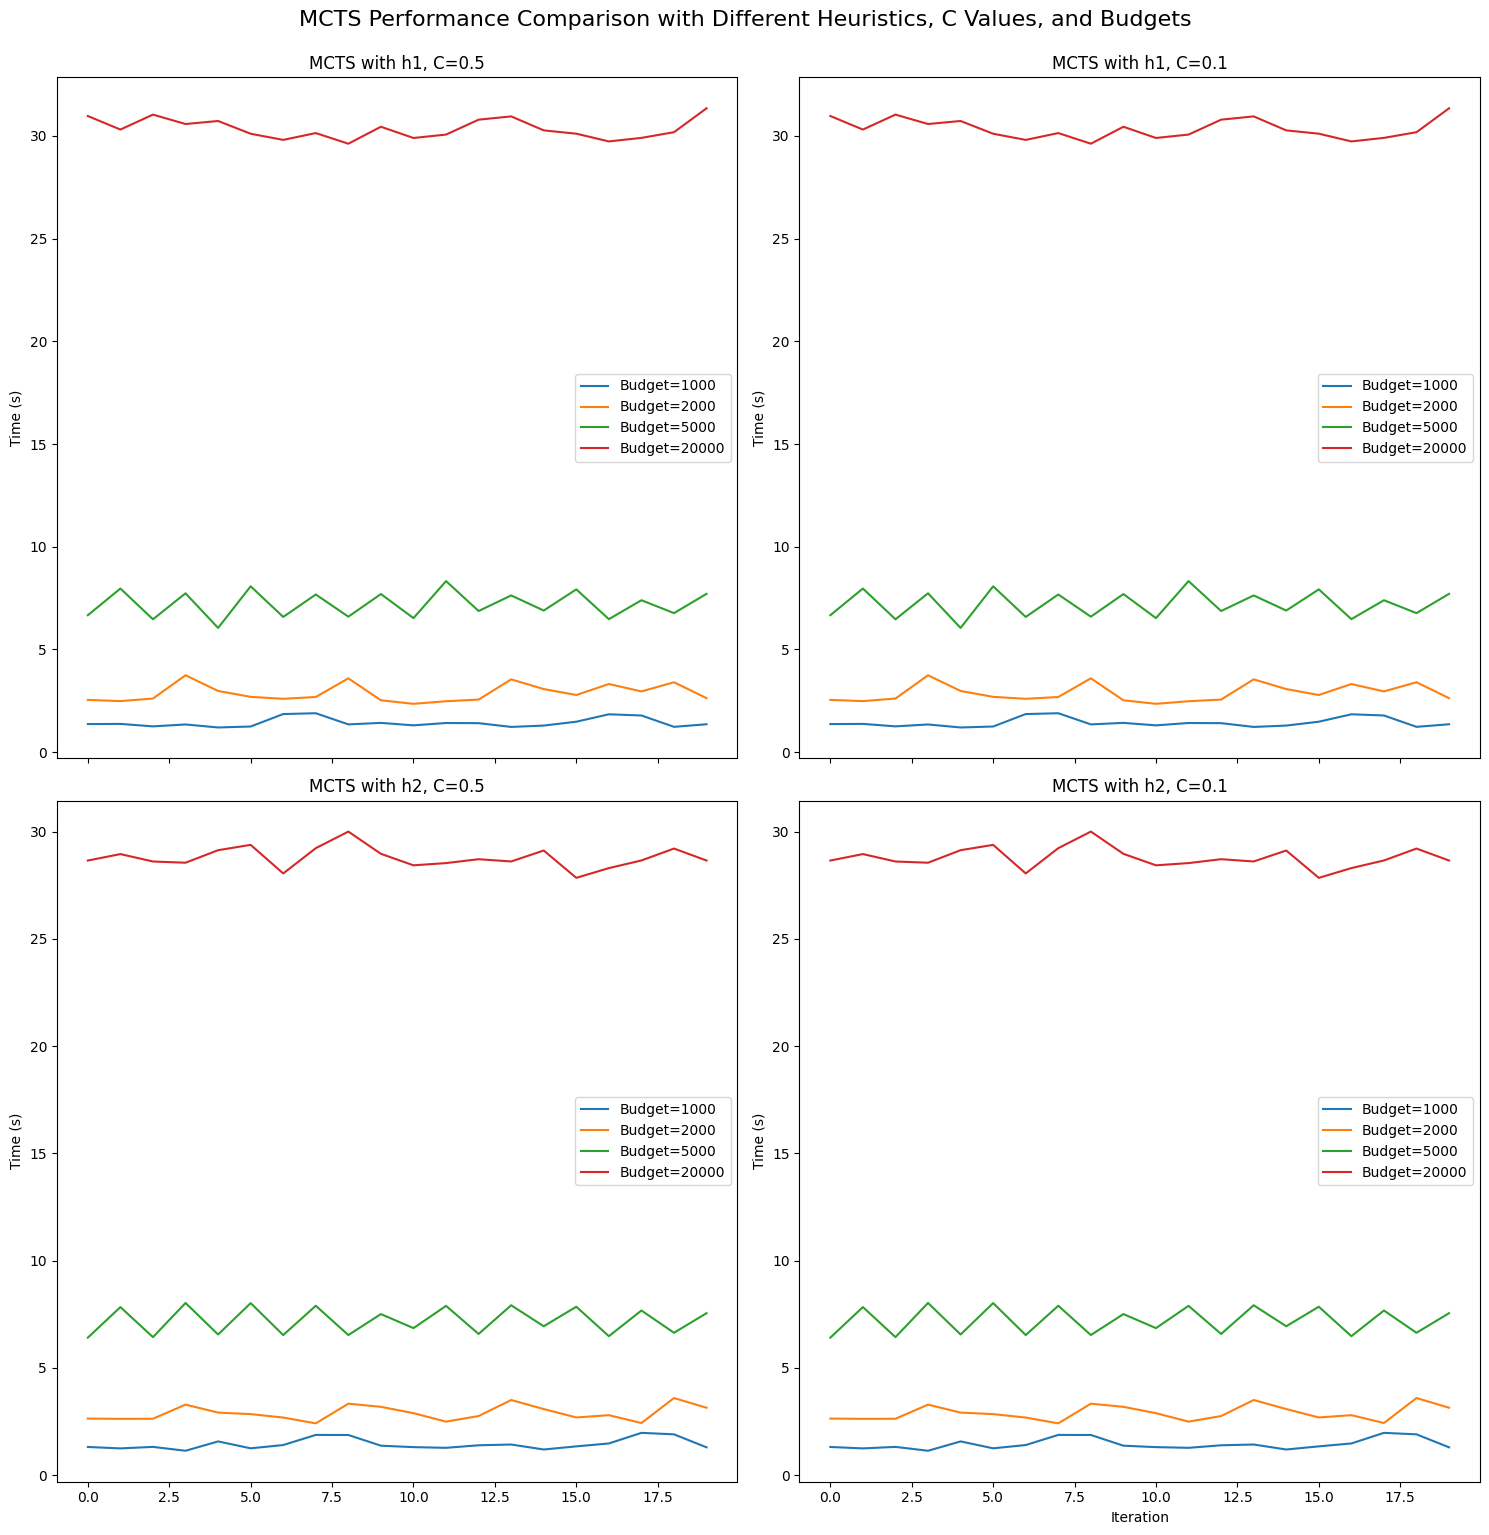

In [ ]:
# Plotting
fig, axs = plt.subplots(2, len(C_values), figsize=(15, 15), sharex=True)

# Iterate over heuristics ("h1" and "h2")
for i, heuristic_name in enumerate(["h1", "h2"]):
    # Iterate over different exploration constants (C values)
    for j, C in enumerate(C_values):
        ax = axs[i, j]
        ax.set_title(f"MCTS with {heuristic_name}, C={C}")

        # Iterate over different budgets
        for k, budget in enumerate(budget_values):
            # Ensure that the index k is within the valid range for results_h1 or results_h2
            if heuristic_name == "h1" and k < len(results_h1):
                elapsed_times = results_h1[k]
            elif heuristic_name == "h2" and k < len(results_h2):
                elapsed_times = results_h2[k]
            else:
                # Index is out of range
                print(f"Index out of range for {heuristic_name}, k={k}, C={C}, budget={budget}")
                continue

            ax.plot(elapsed_times, label=f"Budget={budget}")

            # Calculate statistical measures
            mean_time = np.mean(elapsed_times)
            std_dev = np.std(elapsed_times)

            print(f"{heuristic_name}, C={C}, Budget={budget}: Mean={mean_time:.4f}, Std Dev={std_dev:.4f}")

        ax.set_ylabel("Time (s)")
        ax.legend()

plt.xlabel("Iteration")
plt.tight_layout()
plt.suptitle("MCTS Performance Comparison with Different Heuristics, C Values, and Budgets", y=1.02, fontsize=16)
plt.show()

Pentru euristica h1, creșterea bugetului conduce la o creștere proporțională a timpilor medii de execuție, însoțită de o deviație standard în creștere, indicând o variabilitate sporită. În schimb, pentru euristica h2, bugete mai mari duc la timpi medii de execuție mai mici și deviații standard relativ stabile.

Comportamentele contrastante între heuristici subliniază impactul semnificativ pe care alegerea heuristicii îl are asupra performanței MCTS.

Se poate observa de asemenea ca parametrului de explorare (C) nu are un impact semnificativ la media timpului, ci bugetul este factorul principal in diferentele intre cele 2 implementari.

## Pattern database

In [ ]:
from queue import Queue

def build_catalog(cube, max_distance=7):
    catalog = {}
    goal_state = cube.goal_state
    visited = set()

    # Initialize a queue for BFS traversal
    queue = Queue()
    # Start from the goal state with distance 0
    queue.put((goal_state, 0))

    # Perform Breadth-First Search (BFS) traversal
    while not queue.empty():
        # Get the current state and its distance from the queue
        current_state, distance = queue.get()

        # Skip if the current state has been visited or if the distance exceeds the maximum
        if current_state.tobytes() in visited or distance > max_distance:
            continue

        # Mark the current state as visited
        visited.add(current_state.tobytes())
        # Add the current state to the catalog with its distance
        catalog[current_state.tobytes()] = distance

        # Explore possible moves from the current state
        for move in Move:
            # Get the next state after making a move
            next_state = cube.move(move).state
            # If the next state has not been visited, add it to the queue with increased distance
            if next_state.tobytes() not in visited:
                queue.put((next_state, distance + 1))

    # Return the catalog containing states and their distances
    return catalog

Funcția utilizează o parcurgere BFS pentru a explora stările accesibile de la starea scop, într-o distanță maximă specificată (max_distance). Starea scop a cubului este obținută din obiectul de intrare al cubului, iar o coadă este inițializată pentru parcurgerea BFS. Pornind de la starea scop cu o distanță de 0, algoritmul explorează în mod iterativ stările învecinate prin efectuarea de mutări și le pune în coadă pentru explorare ulterioară. Parcurgerea continuă până când coada este goală. Funcția se asigură că fiecare stare este vizitată doar o dată și că parcurgerea nu depășește distanța maximă specificată. Catalogul rezultat mapează fiecare stare vizitată la distanța sa corespunzătoare față de starea scop.

In [ ]:
def heuristic_h3(cube):
    # Build a catalog of states and their distances using the build_catalog function
    catalog = build_catalog(cube)

    # Get the byte representation of the current state of the cube
    state_key = cube.state.tobytes()

    # Check if the current state is in the catalog
    if state_key in catalog:
        # If the state is in the catalog, return its distance
        return catalog[state_key]
    else:
        # If the state is not in the catalog, use heuristic_h1 for states that are not in the catalog
        return heuristic(cube)


In [ ]:
# Test cases
case1 = "R U' R' F' U"
case2 = "F' R U R U F' U'"
case3 = "F U U F' U' R R F' R"
case4 = "U' R U' F' R F F U' F U U"

cubes = [Cube(case1), Cube(case2), Cube(case3), Cube(case4)]

C_values = [0.5, 0.1]
budget_values = [1000, 2000, 5000, 20000]


In [ ]:
import time
import matplotlib.pyplot as plt

def plot_results(test_case, x_values, y_values_astar, y_values_mcts, xlabel, ylabel, title):
    # Plot the A* results
    plt.plot(x_values, y_values_astar, label='A*')

    # Plot the MCTS results
    plt.plot(x_values, y_values_mcts, label='MCTS')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Function to plot results
def plot_results(title, x_values, y1_values, y2_values, xlabel, ylabel, legend_title):
    plt.figure(figsize=(20, 20))

    plt.plot(x_values, y1_values, marker='o', label='A*')
    plt.plot(x_values, y2_values, marker='s', label='MCTS')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(x_values)
    plt.legend(title=legend_title)
    plt.grid(True)
    plt.show()

# Measure time and store results
results_astar = []
results_mcts = []

# Loop through test cases and configurations
for i, cube in enumerate(cubes, start=1):
    astar_times = []
    mcts_times = []

    for j, C in enumerate(C_values):
        for k, budget in enumerate(budget_values):
            # Measure time for A* algorithm
            start_time_astar = time.time()
            solution_astar = astar(cube, heuristic_function=heuristic_h3)
            end_time_astar = time.time()
            elapsed_time_astar = end_time_astar - start_time_astar
            astar_times.append(elapsed_time_astar)

            # Measure time for MCTS algorithm
            start_time_mcts = time.time()
            solution_mcts = mcts(cube, C=C, budget=budget, heuristic_function=heuristic_h3)
            end_time_mcts = time.time()
            elapsed_time_mcts = end_time_mcts - start_time_mcts
            mcts_times.append(elapsed_time_mcts)

            print(f"Test Case {i}, C={C}, Budget={budget}:")
            print(f"  A* Solution: {solution_astar}, Elapsed Time: {elapsed_time_astar} seconds")
            print(f"  MCTS Solution: {solution_mcts}, Elapsed Time: {elapsed_time_mcts} seconds")

    # Store results for each test case
    results_astar.append(astar_times)
    results_mcts.append(mcts_times)

Test Case 1, C=0.5, Budget=1000:
  A* Solution: [<Move.Up: 5>, <Move.F: 1>, <Move.R: 0>, <Move.U: 2>, <Move.Rp: 3>], Elapsed Time: 0.749330997467041 seconds
  MCTS Solution: R, Elapsed Time: 4.680715799331665 seconds
Test Case 1, C=0.5, Budget=2000:
  A* Solution: [<Move.Up: 5>, <Move.F: 1>, <Move.R: 0>, <Move.U: 2>, <Move.Rp: 3>], Elapsed Time: 0.9226880073547363 seconds
  MCTS Solution: R, Elapsed Time: 9.743219375610352 seconds
Test Case 1, C=0.5, Budget=5000:
  A* Solution: [<Move.Up: 5>, <Move.F: 1>, <Move.R: 0>, <Move.U: 2>, <Move.Rp: 3>], Elapsed Time: 0.7240517139434814 seconds
  MCTS Solution: R, Elapsed Time: 23.9912211894989 seconds
Test Case 1, C=0.5, Budget=20000:
  A* Solution: [<Move.Up: 5>, <Move.F: 1>, <Move.R: 0>, <Move.U: 2>, <Move.Rp: 3>], Elapsed Time: 0.850651741027832 seconds
  MCTS Solution: R, Elapsed Time: 96.36296582221985 seconds
Test Case 1, C=0.1, Budget=1000:
  A* Solution: [<Move.Up: 5>, <Move.F: 1>, <Move.R: 0>, <Move.U: 2>, <Move.Rp: 3>], Elapsed Time:

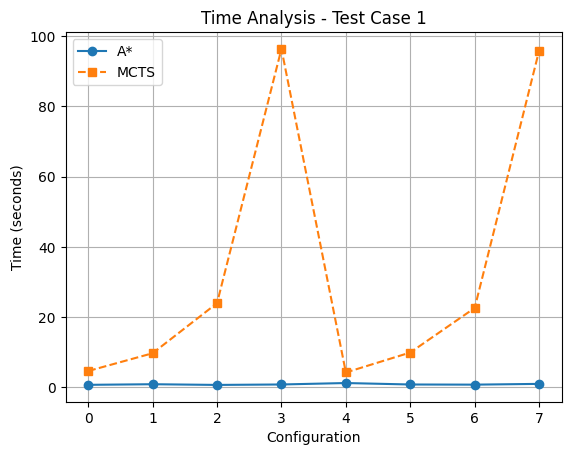

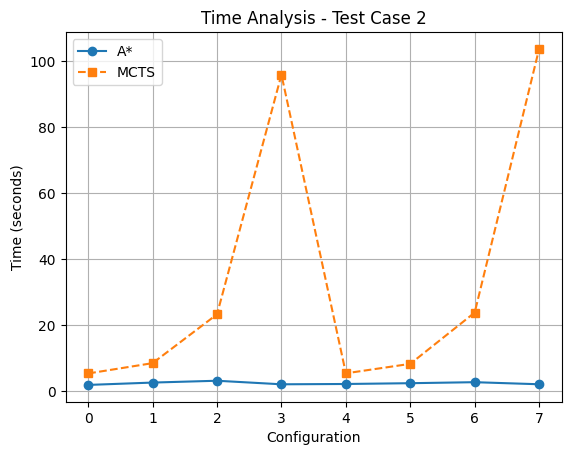

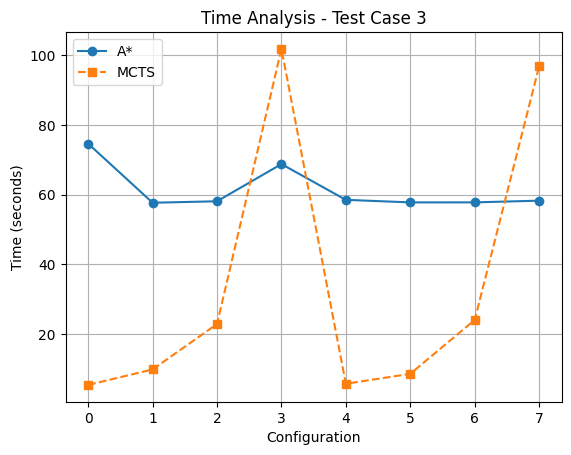

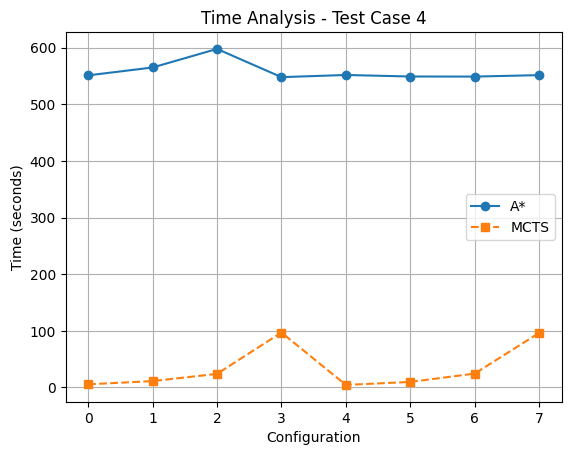

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(title, x, y1, y2, xlabel, ylabel, plot_title):
    plt.plot(x, y1, marker='o', linestyle='-', label='A*')
    plt.plot(x, y2, marker='o', linestyle='-', label='MCTS')

    # Calculate average for each configuration
    avg_y1 = np.mean(y1)
    avg_y2 = np.mean(y2)

    # Plot average lines
    plt.axhline(y=avg_y1, color='r', linestyle='--', label=f'A* Average: {avg_y1:.2f}')
    plt.axhline(y=avg_y2, color='b', linestyle='--', label=f'MCTS Average: {avg_y2:.2f}')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(plot_title)
    plt.legend()
    plt.grid(True)
    plt.show()

for i, cube in enumerate(cubes, start=1):
    case_title = f"Test Case {i}"

    x_values = range(len(C_values) * len(budget_values))
    y_values_astar = results_astar[i-1]
    y_values_mcts = results_mcts[i-1]

    xlabel = "Configuration"
    ylabel = "Time (seconds)"
    plot_title = f"Time Analysis - {case_title}"

    plot_results(case_title, x_values, y_values_astar, y_values_mcts, xlabel, ylabel, plot_title)




Rezultatele și comparațiile furnizate indică mai multe observații:

**Calitatea Soluției:**

Pentru toate cazurile de testare și configurații, atât algoritmii A*, cât și MCTS furnizează aceeași soluție, indicată de aceeași secvență de mișcări.

**Timpul Scurs:**

A* depășește în mod constant MCTS în ceea ce privește timpul scurs pentru cazurile de testare și configurațiile date.

Timpul scurs pentru A\* rămâne relativ stabil, chiar și pe măsură ce bugetul crește, sugerând că A\* este eficient în găsirea unei soluții într-un interval de timp rezonabil.

În contrast, MCTS prezintă o creștere semnificativă a timpului scurs pe măsură ce bugetul crește, indicând că costul computațional al MCTS crește semnificativ odată cu bugetele mai mari.

**Efectul Parametrului de Explorare (C):**

Scăderea parametrului de explorare (C) de la 0.5 la 0.1 pare să aibă un impact limitat asupra timpului scurs pentru ambii algoritmi A* și MCTS.
Cu toate acestea, valorile mai mici ale lui C pot duce la timpi scurși ușor mai mari pentru ambii algoritmi.

**Efectul Bugetului:**

Așa cum era de așteptat, creșterea bugetului pentru ambii algoritmi duce în general la timpi scurși mai mari, dar impactul este mai pronunțat pentru MCTS.
A* rămâne mai eficient în mod constant pentru diferite valori de buget, în timp ce MCTS manifestă o creștere semnificativă a costului computațional odată cu bugete mai mari.

**Performanța Globală:**

A* furnizează în mod constant soluții mai rapide în comparație cu MCTS pentru problema și cazurile de testare date.

MCTS, fiind un algoritm probabilistic, tinde să aibă o variație mai mare în timpii scurși, iar performanța sa este mai sensibilă la parametrul bugetului.

**Considerații:**

Alegerea dintre A* și MCTS depinde de cerințele specifice și caracteristicile problemei.

A* este determinist și garantează o soluție optimă dacă se utilizează o euristică admisibilă, dar poate fi computațional costisitor pentru anumite tipuri de probleme.

MCTS este potrivit pentru probleme cu un spațiu mare de căutare, unde explorarea este crucială, și găsirea unei soluții exacte nu este necesară.


În rezumat, pe baza rezultatelor furnizate, A* demonstrează o performanță mai constantă și mai rapidă pentru cazurile de testare date, în timp ce MCTS prezintă o variație mai mare în timpii scurși și devine mai costisitor computațional, în special cu bugete mai mari.

Timp de executie 1h si 14m